In [2]:

from sklearn.metrics import jaccard_score
import pandas as pd
import numpy as np
import os

folder = os.path.join("/", "RanD", "CREMEv2_Result", "Reproducibility_Measurement", "Working", "traffic")
lst = os.listdir(folder)

del_cols_list = ["StartTime", "LastTime"]
combinations = []



ground_truth = pd.read_csv(os.path.join(folder, "clean_label_traffic_20230310.csv"))

test_1 = pd.read_csv(os.path.join(folder, "preprocess_label_traffic.csv")) # Normal

# test_1.drop(columns=del_cols_list)

common_features = list(set(ground_truth) & set(test_1))

gt_final = ground_truth[common_features]
test_1_final = test_1[common_features]

In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

pca = PCA(n_components=2)

ground_truth_scaled = scaler.fit(gt_final).transform(gt_final)

sec_1_scaled = scaler.fit(test_1_final).transform(test_1_final)



In [4]:

ground_truth_covarianceMatrix = np.cov(np.transpose(np.array(ground_truth_scaled)))

sec_1_covarianceMatrix = np.cov(np.transpose(np.array(sec_1_scaled)))


pca_ground_truth = pca.fit(ground_truth_covarianceMatrix).transform(ground_truth_covarianceMatrix)

pca_sec_1 = pca.fit(sec_1_covarianceMatrix).transform(sec_1_covarianceMatrix)


In [5]:
df_pca_ground_truth = pd.DataFrame(pca_ground_truth, columns =['comp1','comp2'])
df_pca_ground_truth_vertical = df_pca_ground_truth['comp1'].append(df_pca_ground_truth['comp2']).reset_index(drop=True)



df_pca_sec_1 = pd.DataFrame(pca_sec_1, columns =['comp1','comp2'])
df_pca_sec_1_vertical = df_pca_sec_1['comp1'].append(df_pca_sec_1['comp2']).reset_index(drop=True)


/tmp/ipykernel_3868724/1882622214.py:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_pca_ground_truth_vertical = df_pca_ground_truth['comp1'].append(df_pca_ground_truth['comp2']).reset_index(drop=True)
/tmp/ipykernel_3868724/1882622214.py:7: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_pca_sec_1_vertical = df_pca_sec_1['comp1'].append(df_pca_sec_1['comp2']).reset_index(drop=True)


In [6]:
corr_gt_1 = np.corrcoef(df_pca_ground_truth_vertical, df_pca_sec_1_vertical)[0,1]

print("correlation of the data is {}".format(corr_gt_1))

correlation of the data is 0.5026218860187311


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


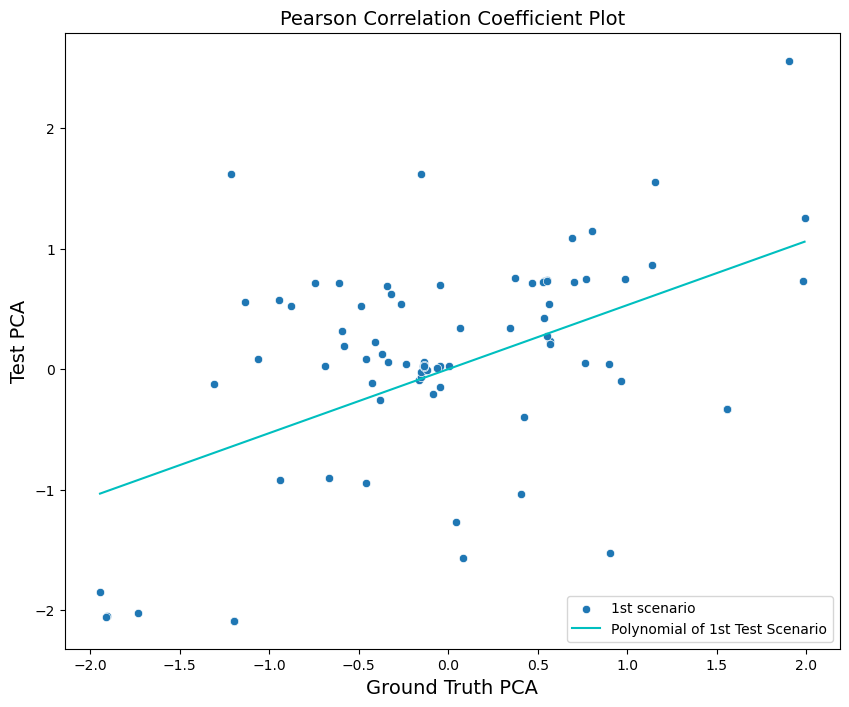

In [7]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns

colors = sns.set_palette("tab10", n_colors=10)

colors = {
    'ruby':'#D8334A',
    'grapefruit':'#ED5565',
    'bittersweet':'#FC6E51',
    'sunflower':'#FFCE54',
    'straw':'#E8CE4D',
    'grass':'#A0D468',
    'mint':'#48CFAD',
    'teal':'#A0CECB',
    'aqua':'#4FC1E9',
    'bluejeans':'#5D9CEC'
}

fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(x=df_pca_ground_truth_vertical, y=df_pca_sec_1_vertical, label="1st scenario", palette=colors)
plt.title(f"Pearson Correlation Coefficient Plot", fontsize=14)

# polynomial plot
z_gt_1 = np.polyfit(df_pca_ground_truth_vertical, df_pca_sec_1_vertical, 1)
p_gt_1 = np.poly1d(z_gt_1)


sns.lineplot(df_pca_ground_truth_vertical, p_gt_1(df_pca_ground_truth_vertical), linestyle='-', label='Polynomial of 1st Test Scenario', color='c')

handles, labels = plt.gca().get_legend_handles_labels()

# Line1 = Line2D([0], [0], color='r', label='Polynomial of 1st Test Scenario')
# Line2 = Line2D([0], [0], color='g', label='Polynomial of 2nd Test Scenario')
# Line3 = Line2D([0], [0], color='b', label='Polynomial of 3rd Test Scenario')
# Line4 = Line2D([0], [0], color='k', label='Polynomial of 4th Test Scenario')

# Line5 = Line2D([0], [0], color='w', label=f'PCC 1st Test Scenario: {corr_gt_1:.4f}')
# Line6 = Line2D([0], [0], color='w', label=f'PCC 2nd Test Scenario: {corr_gt_2:.4f}')
# Line7 = Line2D([0], [0], color='w', label=f'PCC 3rd Test Scenario: {corr_gt_3:.4f}')
# Line8 = Line2D([0], [0], color='w', label=f'PCC 4th Test Scenario: {corr_gt_4:.4f}')

# handles.extend([Line1, Line2, Line3, Line4, Line5, Line6, Line7, Line8])
# handles.extend([Line5, Line6, Line7, Line8])

ax.legend(handles=handles, loc='lower right')
plt.xlabel('Ground Truth PCA', fontsize=14)
plt.ylabel('Test PCA', fontsize=14)


plt.show()